In [5]:
# Basic Web crawling python code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import urllib.request
from bs4 import BeautifulSoup
import time 

start_time = time.time()

url = "http://quotes.toscrape.com/page/"
page_no = 1
# print(url)

quotes_list = []
author_list = []
tag_list = []
page_list = []
while page_no < 50:
    
    req = urllib.request.Request(url + str(page_no))
    page = urllib.request.urlopen(req).read()
    soup = BeautifulSoup(page, 'html.parser')
    
    #crawling stops when no quotes available 
    No_Quotes=soup.find_all(class_= "col-md-8")
    to_break=''
    for y in No_Quotes:
        if "No quotes found!" in y.text:
            to_break ="break"
    if to_break =="break":
        break
    
    for quote in soup.find_all(class_="quote"):
        
        # extracting quotes
        quotes_list.append(quote.find(class_="text").get_text())

        # extracting author
        author_list.append(quote.find(class_="author").get_text())
       
        
        # extracting tags
        tags = quote.find_all("a", {"class": "tag"})
        temp_tag = []
        for tag in tags:
            temp_tag.append(tag.text)
        tag_list.append(temp_tag)
        # creating page list
        page_list.append(str(page_no))
        
    page_no += 1
    
#calculating time 
elapsed_time= time.time() - start_time
print("Time taken to crawl in sec:",elapsed_time)


Time taken to crawl in sec: 2.186415910720825


In [3]:
#creating dataframe
zipped_Data= list(zip(page_list,quotes_list,author_list,tag_list))
quotes_DF= pd.DataFrame(zipped_Data,columns=['Page_Number','Quotes','Author','Tags'])
quotes_DF = quotes_DF.astype(dtype= {"Page_Number":"int64", "Quotes":"str","Author":"str",'Tags':'object'})
quotes_DF

,Page_Number,Quotes,Author,Tags
0,1,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,1,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,1,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,1,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
...,...,...,...,...
95,10,“You never really understand a person until yo...,Harper Lee,[better-life-empathy]
96,10,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,..."
97,10,“Never tell the truth to people who are not wo...,Mark Twain,[truth]
98,10,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational]


In [4]:
#total Number of valid pages crawled 
print("total Number of valid pages crawled:",max(quotes_DF.Page_Number))


total Number of valid pages crawled: 10


Text(0.5, 1.0, 'Frequency distribution Quotes per author')

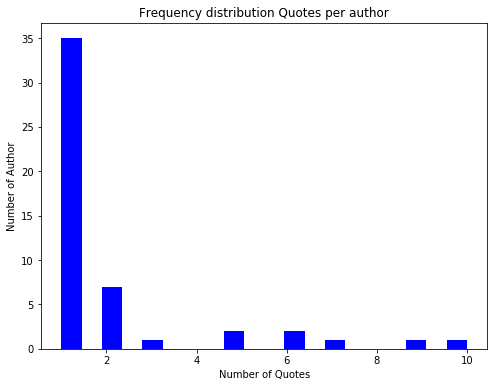

In [5]:
#provide frequency distribution of number of quotes per author 
freq_Author=quotes_DF.groupby('Author').nunique()
plt.figure(figsize=[8,6])
plt.hist(freq_Author['Quotes'], facecolor='blue',bins=20)
plt.xlabel("Number of Quotes")
plt.ylabel("Frequency of Author")
plt.title('Frequency distribution Quotes per author')


Text(0.5, 1.0, 'Frequency distribution of tags')

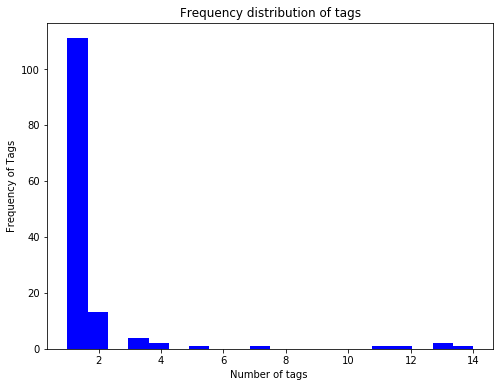

In [17]:
#Provide Frequency Distribution of tags
x=quotes_DF['Tags']
list_tags=[]
for row in x:
    for item in row:
        list_tags.append(item)

list_tags_DF= pd.DataFrame(list_tags,columns=['Tags'])    
list_tags_DF.groupby('Tags').size()
plt.figure(figsize=[8,6])
plt.hist(list_tags_DF.groupby('Tags').size(),bins=20,facecolor='blue')
plt.xlabel("Number of tags ")
plt.ylabel("Frequency of Tags")
plt.title('Frequency distribution of Tags')


In [27]:
#plot average number of quotes(no. of words) per author
quotes_DF['no_of_words']=list(map(lambda x : len(x.split()),quotes_DF.iloc[:,1]))
quotes_DF

,Page_Number,Quotes,Author,Tags,no_of_words
0,1,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]",21
1,1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]",16
2,1,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]",26
3,1,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]",19
4,1,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]",16
...,...,...,...,...,...
95,10,“You never really understand a person until yo...,Harper Lee,[better-life-empathy],27
96,10,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,...",27
97,10,“Never tell the truth to people who are not wo...,Mark Twain,[truth],12
98,10,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational],8


Text(0.5, 1.0, 'Frequency distribution average words per author')

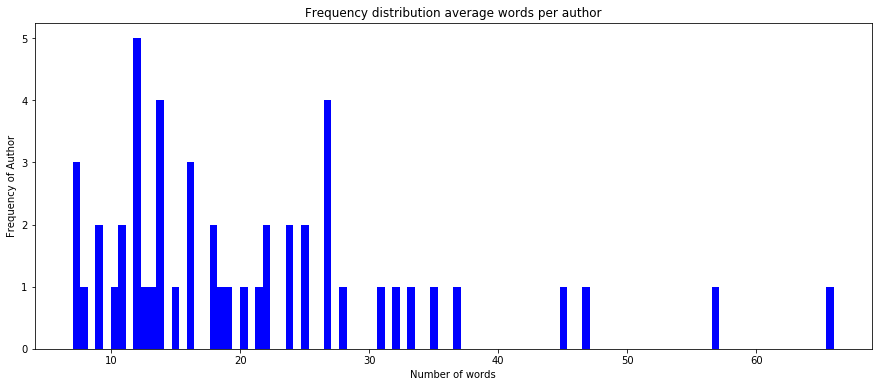

In [78]:
df_no_of_words=quotes_DF.groupby(['Author']).mean()
plt.figure(figsize=[15,6])
plt.hist(df_no_of_words['no_of_words'], facecolor='blue',bins=100)
plt.xlabel("Number of words")
plt.ylabel("Frequency of Author")
plt.title('Frequency distribution average words per author')
